In [2]:
from structs.works import TV, FanWork
import matplotlib.pyplot as plt

res=TV.retrieve(TV.search(title='Our Flag Means Death')[0])
ofmd=TV(title=res.get('title'), 
        data=res, 
        genres=res.get('genres'), 
        id=res.movieID, 
        author=res.get('writers')[0], 
        date=res.get('year'), 
        fandom='Our Flag Means Death (TV 2022)')

ofmd.get_fics()

Works downloaded:   0%|          | 0/28 [00:00<?, ?it/s]

In [3]:
ofmd.fics

{49305382: {},
 49080238: {},
 48346447: {},
 48097093: {},
 47735908: {},
 47342806: {},
 47342002: {},
 47228389: {},
 46562398: {},
 46202890: {},
 46170478: {},
 46007938: {},
 46005055: {},
 45795301: {},
 45673525: {},
 44574385: {},
 44440831: {},
 44418235: {},
 44342668: {},
 44335084: {},
 44125755: {},
 44049171: {},
 44029317: {},
 43995810: {},
 43995616: {},
 43995459: {},
 43995238: {},
 43995136: {},
 43985088: {},
 43975903: {},
 43907427: {},
 43873105: {},
 43800660: {},
 43760088: {},
 43723314: {},
 43704295: {},
 43704015: {},
 43703835: {},
 43700286: {},
 43688935: {},
 43672026: {},
 43651245: {},
 43508112: {},
 43487307: {},
 43439850: {},
 43405320: {},
 43273546: {},
 43151583: {},
 43141323: {},
 43109959: {},
 43088337: {},
 43068492: {},
 43051464: {},
 43032267: {},
 43031124: {},
 43030863: {},
 43030779: {},
 43030539: {},
 43030389: {},
 43030287: {},
 43030155: {},
 43029987: {},
 43010661: {},
 42996567: {},
 42990717: {},
 42978603: {},
 42937275:

Text(0, 0.5, 'Kudos')

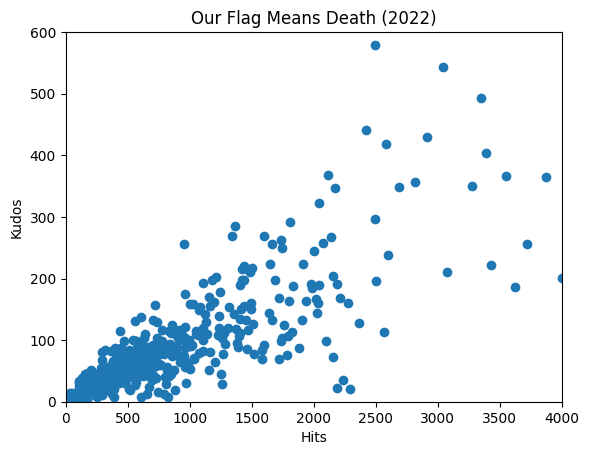

In [4]:
y=[f.kudos for f in ofmd.fics.values()]
x=[g.hits for g in ofmd.fics.values()]

plt.scatter(x, y)

plt.title('Our Flag Means Death (2022)')
plt.xlim((0,4000))
plt.ylim((0, 600))
plt.xlabel('Hits')
plt.ylabel('Kudos')

In [5]:
import pandas as pd

def sort_by_kudos(fics):
    f=pd.DataFrame.from_records([f.__dict__ for f in fics.values()])
    return f.sort_values(by=['kudos'], ascending=False)

ranked_by_popularity=sort_by_kudos(ofmd.fics)['id']

In [6]:
top5=[ofmd.fics[t] for t in ranked_by_popularity[0:5]]


In [7]:
top5

[{}, {}, {}, {}, {}]

In [8]:
for t in top5:
    print(t.kudos)

1297
947
843
689
667


In [9]:
from scrapers.ao3 import FicEncoder 

import json
f=open('ofmd_top_5.json', 'w+')
json.dump([d.__dict__ for d in top5], f, cls=FicEncoder)
f.close()

In [10]:
def df(fics):
    return pd.DataFrame.from_records([f.__dict__ for f in fics.values()])


In [11]:
df=df(ofmd.fics)

In [12]:
df

,title,id,date,author,chapters,kudos,hits,characters,tags,fandoms,ships,warnings,rating
0,Oh no! It's Cake.,49305382,2023-08-12,JoQuickly,1,10,46,"[Spanish Jackie (Our Flag Means Death), Lucius...","[TV Host Lucius Spriggs, TV Show Director Span...","[Our Flag Means Death (TV), Is it Cake? - Fandom]",[],[No Archive Warnings Apply],Teen And Up Audiences
1,GentleBeard and RamBheem Double Date,49080238,2023-08-03,rolystatz,1,4,62,"[Blackbeard | Edward Teach, Stede Bonnet, Allu...","[soft, fun beach day, they smoke weed before g...","[RRR (2022), Our Flag Means Death (TV)]","[Blackbeard | Edward Teach/Stede Bonnet, Allur...",[Creator Chose Not To Use Archive Warnings],Not Rated
2,☠️ Our Rings Mean Death ☠️,48346447,2023-09-03,you_wear_fine_things_well,8,79,1074,"[Galadriel | Artanis, Halbrand (The Rings of P...",[Alternate Universe - Pirates of the Caribbean...,[The Lord of the Rings: The Rings of Power (TV...,[Galadriel | Artanis/Halbrand (The Rings of Po...,[Creator Chose Not To Use Archive Warnings],Explicit
3,Catch a Wave and Take in the Sweetness,48097093,2023-06-24,SpaceCadetGlow,1,132,705,"[Blackbeard | Edward Teach, Stede Bonnet, Isra...","[Kinktober 2022, OFMD Kinktober 2022, Oral Sex...",[Our Flag Means Death (TV)],[Blackbeard | Edward Teach/Stede Bonnet/Israel...,[No Archive Warnings Apply],Explicit
4,Devenir Gris,47735908,2023-06-08,SpaceCadetGlow,1,45,246,"[Israel Hands, Blackbeard | Edward Teach]","[Kinktober 2022, OFMD Kinktober 2022, Horror, ...",[Our Flag Means Death (TV)],"[Blackbeard | Edward Teach/Israel Hands, Black...",[No Archive Warnings Apply],Teen And Up Audiences
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,A Drop of Nelson's Blood,38609853,2022-05-04,Getaway_Kit,8,593,6302,"[Stede Bonnet, Blackbeard | Edward Teach, Luci...","[Renaissance Faire AU, God help me I'm writing...",[Our Flag Means Death (TV)],"[Blackbeard | Edward Teach/Stede Bonnet, Black...",[No Archive Warnings Apply],Explicit
555,an ocean without its unnamed monsters (would b...,38529319,2022-04-21,OzzyFeet (orphan_account),1,132,1661,"[Israel Hands, Blackbeard | Edward Teach, Sted...","[Israel Hands-centric, Israel Hands Has Issues...",[Our Flag Means Death (TV)],"[Blackbeard | Edward Teach/Israel Hands, Black...",[No Archive Warnings Apply],Explicit
556,a silver ring around his throat,38445268,2022-04-17,OzzyFeet (orphan_account),1,323,2040,"[Israel Hands, Blackbeard | Edward Teach, Luci...","[Angst, Character Study, Izzy Hands is a Littl...",[Our Flag Means Death (TV)],"[Blackbeard | Edward Teach/Israel Hands, Black...",[No Archive Warnings Apply],Teen And Up Audiences
557,Haunted,38425891,2022-04-17,OzzyFeet (orphan_account),1,38,255,"[Blackbeard | Edward Teach, Stede Bonnet]","[Haunting, Ghosts, Angst, angstpril 2022, Firs...",[Our Flag Means Death (TV)],[Blackbeard | Edward Teach/Stede Bonnet],[No Archive Warnings Apply],Teen And Up Audiences


(array([203., 151.,  74.,  41.,  26.,  21.,   9.,   4.,   4.,   4.,   5.,
          1.,   1.,   3.,   1.,   0.,   3.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2.60000e+01, 4.13200e+02, 8.00400e+02, 1.18760e+03, 1.57480e+03,
        1.96200e+03, 2.34920e+03, 2.73640e+03, 3.12360e+03, 3.51080e+03,
        3.89800e+03, 4.28520e+03, 4.67240e+03, 5.05960e+03, 5.44680e+03,
        5.83400e+03, 6.22120e+03, 6.60840e+03, 6.99560e+03, 7.38280e+03,
        7.77000e+03, 8.157

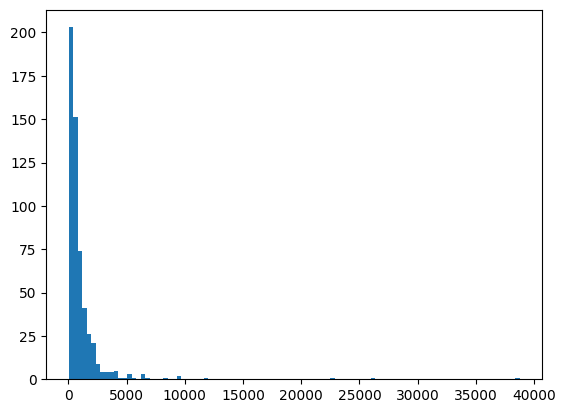

In [13]:
plt.hist(df['hits'], bins=100)

In [14]:
import numpy as np
df['log-hits']=np.log(df['hits'])

(array([ 2.,  2.,  0.,  2.,  3.,  1.,  0.,  2.,  2.,  1.,  1.,  3.,  0.,
         1.,  0.,  2.,  4.,  0.,  2.,  6.,  4.,  3., 10.,  8., 10.,  9.,
        16., 16., 11.,  6., 11., 12.,  6., 15.,  6.,  7., 10., 13.,  9.,
        13., 15., 14., 24., 21., 15., 25., 12., 16., 13., 19., 11., 11.,
        10.,  9., 15., 10.,  8., 11.,  7.,  9., 10.,  3.,  6.,  2.,  2.,
         2.,  4.,  3.,  3.,  3.,  1.,  1.,  3.,  1.,  0.,  3.,  1.,  0.,
         0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 3.25809654,  3.3311634 ,  3.40423026,  3.47729713,  3.55036399,
         3.62343085,  3.69649771,  3.76956458,  3.84263144,  3.9156983 ,
         3.98876516,  4.06183203,  4.13489889,  4.20796575,  4.28103262,
         4.35409948,  4.42716634,  4.5002332 ,  4.57330007,  4.64636693,
         4.71943379,  4.79250065,  4.86556752,  4.93863438,  5.01170124,
         5.0847681 ,  5.15783497,  5.23090183,  5.30396869,  5.377035

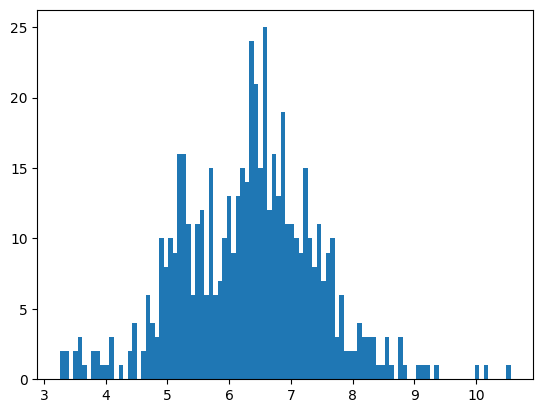

In [15]:
plt.hist(df['log-hits'], bins=100)

In [16]:
df['hitsLikesRatio']=df['hits']/df['kudos']

(array([16., 22., 47., 81., 67., 60., 51., 55., 30., 22., 17., 15.,  9.,
         7., 13.,  5.,  2.,  3.,  2.,  3.,  2.,  5.,  3.,  2.,  0.,  2.,
         2.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
         0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([  2.78571429,   3.93214286,   5.07857143,   6.225     ,
          7.37142857,   8.51785714,   9.66428571,  10.81071429,
         11.95714286,  13.10357143,  14.25      ,  15.39642857,
         16.54285714,  17.68928571,  18.83571429,  19.98214286,
         21.12857143,  22.275     ,  23.42142857,  24.56785714,
         25.71428571,  26.86071429,  28.00714286,  29.15357143,
         30.3       ,  31.44642857,  32.59285714, 

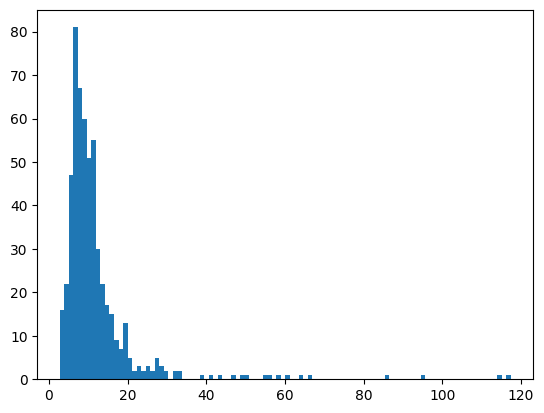

In [17]:
plt.hist(df['hitsLikesRatio'], bins=100)

In [18]:
df['logHitsLikesRatio']=np.log(df['hitsLikesRatio'])

(array([ 1.,  0.,  0.,  1.,  0.,  2.,  2.,  3.,  5.,  2.,  1.,  4.,  3.,
         7.,  4.,  2.,  5.,  6., 10., 12.,  8., 13., 17., 22., 19., 16.,
        14., 20., 16., 19., 14., 24., 17., 22., 14., 16., 29., 14., 16.,
        10., 14., 13.,  6., 12.,  9.,  8.,  7.,  6.,  6.,  4.,  3.,  8.,
         8.,  3.,  2.,  2.,  2.,  1.,  2.,  1.,  5.,  3.,  2.,  2.,  0.,
         2.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  2.,
         0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.]),
 array([1.02450432, 1.06191758, 1.09933084, 1.13674409, 1.17415735,
        1.21157061, 1.24898387, 1.28639713, 1.32381039, 1.36122365,
        1.39863691, 1.43605017, 1.47346343, 1.51087669, 1.54828995,
        1.58570321, 1.62311647, 1.66052972, 1.69794298, 1.73535624,
        1.7727695 , 1.81018276, 1.84759602, 1.88500928, 1.92242254,
        1.9598358 , 1.99724906, 2.03466232, 2.07207558, 2.10948884,
        2.1469021 , 2.1843

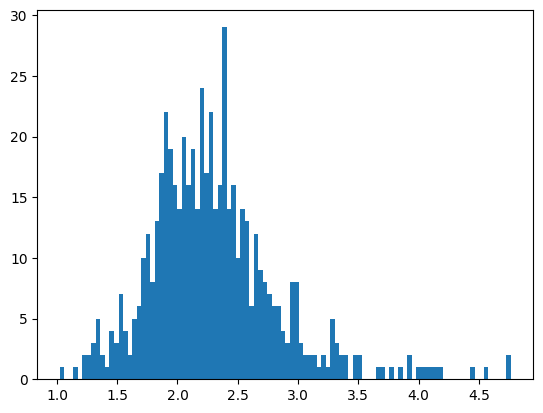

In [19]:
plt.hist(df['logHitsLikesRatio'], bins=100)

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

X=df[['hits']]
y=df['kudos']

In [21]:
type(X)

pandas.core.frame.DataFrame

In [22]:
type(y)

pandas.core.series.Series

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
model.predict(X_test)

array([  90.9486751 ,   65.30388572,   62.92158289,   73.01133608,
        126.58979404, 1265.4706863 ,   98.70283728,   52.1778642 ,
         56.42863985,   96.88107629,   80.95234555,   48.62776585,
         91.50921695,  230.1966116 ,  137.42693636,  110.28736873,
         49.98240864,   70.86259235,   51.29033962,   56.38192803,
         69.64808502,   71.32971055,   85.85708668,  186.56777139,
         55.02728524,   53.48579517,  147.8436723 ,   51.19691597,
         79.03716091,   63.94924293,  338.89501759,   46.15203938,
        237.10996102,  102.67334201,   96.2271108 ,  150.69309335,
         57.17602898,   72.96462426,   54.88714978,   58.53067177,
         68.85398407,  143.31262573,   52.87854151,   89.50060867,
         56.28850439,   78.38319543,   51.19691597,   68.34015405,
         54.84043796,  102.20622381,  130.23331603,   47.88037673,
         55.86809801,   86.27749307,   53.95291338,   52.78511787,
         80.01810914,   53.43908335,   89.96772688,   54.37331

In [26]:
hits=X_test
kudos=model.predict(X_test)

len(kudos)

392

In [27]:
X_test

,hits
77,994
510,445
173,394
290,610
122,1757
...,...
213,1638
1,62
448,124
443,321


In [28]:
hits=X_test['hits']

In [29]:
p=pd.DataFrame({'hits':hits, 'kudos':kudos})

In [30]:
p

,hits,kudos
77,994,90.948675
510,445,65.303886
173,394,62.921583
290,610,73.011336
122,1757,126.589794
...,...,...
213,1638,121.031087
1,62,47.413259
448,124,50.309391
443,321,59.511620


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

r2=r2_score(y_test, kudos)

In [32]:
r2

0.47416254889383014

In [33]:
mse=mean_squared_error(y_test, kudos, squared=False)

In [34]:
mse

96.39349240555167

In [35]:
df

,title,id,date,author,chapters,kudos,hits,characters,tags,fandoms,ships,warnings,rating,log-hits,hitsLikesRatio,logHitsLikesRatio
0,Oh no! It's Cake.,49305382,2023-08-12,JoQuickly,1,10,46,"[Spanish Jackie (Our Flag Means Death), Lucius...","[TV Host Lucius Spriggs, TV Show Director Span...","[Our Flag Means Death (TV), Is it Cake? - Fandom]",[],[No Archive Warnings Apply],Teen And Up Audiences,3.828641,4.600000,1.526056
1,GentleBeard and RamBheem Double Date,49080238,2023-08-03,rolystatz,1,4,62,"[Blackbeard | Edward Teach, Stede Bonnet, Allu...","[soft, fun beach day, they smoke weed before g...","[RRR (2022), Our Flag Means Death (TV)]","[Blackbeard | Edward Teach/Stede Bonnet, Allur...",[Creator Chose Not To Use Archive Warnings],Not Rated,4.127134,15.500000,2.740840
2,☠️ Our Rings Mean Death ☠️,48346447,2023-09-03,you_wear_fine_things_well,8,79,1074,"[Galadriel | Artanis, Halbrand (The Rings of P...",[Alternate Universe - Pirates of the Caribbean...,[The Lord of the Rings: The Rings of Power (TV...,[Galadriel | Artanis/Halbrand (The Rings of Po...,[Creator Chose Not To Use Archive Warnings],Explicit,6.979145,13.594937,2.609697
3,Catch a Wave and Take in the Sweetness,48097093,2023-06-24,SpaceCadetGlow,1,132,705,"[Blackbeard | Edward Teach, Stede Bonnet, Isra...","[Kinktober 2022, OFMD Kinktober 2022, Oral Sex...",[Our Flag Means Death (TV)],[Blackbeard | Edward Teach/Stede Bonnet/Israel...,[No Archive Warnings Apply],Explicit,6.558198,5.340909,1.675396
4,Devenir Gris,47735908,2023-06-08,SpaceCadetGlow,1,45,246,"[Israel Hands, Blackbeard | Edward Teach]","[Kinktober 2022, OFMD Kinktober 2022, Horror, ...",[Our Flag Means Death (TV)],"[Blackbeard | Edward Teach/Israel Hands, Black...",[No Archive Warnings Apply],Teen And Up Audiences,5.505332,5.466667,1.698669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,A Drop of Nelson's Blood,38609853,2022-05-04,Getaway_Kit,8,593,6302,"[Stede Bonnet, Blackbeard | Edward Teach, Luci...","[Renaissance Faire AU, God help me I'm writing...",[Our Flag Means Death (TV)],"[Blackbeard | Edward Teach/Stede Bonnet, Black...",[No Archive Warnings Apply],Explicit,8.748622,10.627319,2.363428
555,an ocean without its unnamed monsters (would b...,38529319,2022-04-21,OzzyFeet (orphan_account),1,132,1661,"[Israel Hands, Blackbeard | Edward Teach, Sted...","[Israel Hands-centric, Israel Hands Has Issues...",[Our Flag Means Death (TV)],"[Blackbeard | Edward Teach/Israel Hands, Black...",[No Archive Warnings Apply],Explicit,7.415175,12.583333,2.532373
556,a silver ring around his throat,38445268,2022-04-17,OzzyFeet (orphan_account),1,323,2040,"[Israel Hands, Blackbeard | Edward Teach, Luci...","[Angst, Character Study, Izzy Hands is a Littl...",[Our Flag Means Death (TV)],"[Blackbeard | Edward Teach/Israel Hands, Black...",[No Archive Warnings Apply],Teen And Up Audiences,7.620705,6.315789,1.843053
557,Haunted,38425891,2022-04-17,OzzyFeet (orphan_account),1,38,255,"[Blackbeard | Edward Teach, Stede Bonnet]","[Haunting, Ghosts, Angst, angstpril 2022, Firs...",[Our Flag Means Death (TV)],[Blackbeard | Edward Teach/Stede Bonnet],[No Archive Warnings Apply],Teen And Up Audiences,5.541264,6.710526,1.903677


In [36]:
df['is_erotica']=[1 if f=='Explicit' else 0 for f in df['rating']]

In [37]:
df['is_erotica']

0      0
1      0
2      1
3      1
4      0
      ..
554    1
555    1
556    0
557    0
558    0
Name: is_erotica, Length: 559, dtype: int64

In [38]:
erotic_model=LinearRegression()

X=df[['hits', 'is_erotica']]
y=df['kudos']

In [39]:
X

,hits,is_erotica
0,46,0
1,62,0
2,1074,1
3,705,1
4,246,0
...,...,...
554,6302,1
555,1661,1
556,2040,0
557,255,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

In [41]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
kudos=model.predict(X_test)

In [43]:
kudos

array([  42.79475725,   42.26658861,   39.3993874 ,  112.9121391 ,
         95.78438455,   94.08669963,   38.98439775,   89.93680315,
         39.21075574,  110.53538021,   76.27987111,  107.44182102,
         96.0861952 ,   40.34254569,   87.42500754,  440.79168714,
        230.50511474,  215.41458209,   99.82110203,   71.65540093,
         98.42522776,   42.83248358,   54.9049097 ,   86.6546123 ,
         44.56789483,   41.28570398,   42.34204127,   36.72081786,
         74.03215982,  202.73853467,   89.78589782,   42.56839926,
        224.92161766,   88.42774989,   56.75349994,   83.93831642,
        116.83567759,   41.77614629,   96.46345852,  134.68023244,
         85.91595428,   84.46648507,   41.32343031,   40.15391403,
        131.24713627,  114.72300302,   41.88932529,   52.49042447,
        144.18726801,   95.57389517,   40.64435635,  155.73152548,
         96.46345852,  323.46279583,   46.41648508,   46.26557976,
         46.34103242,   47.09555905,  101.3301553 ,   95.04572

In [44]:
actual_kudos=y_test
predicted_kudos=kudos
hits=X_test['hits']

mse=mean_squared_error(actual_kudos, predicted_kudos, squared=False)

In [45]:
mse

79.50395353466281

findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following 

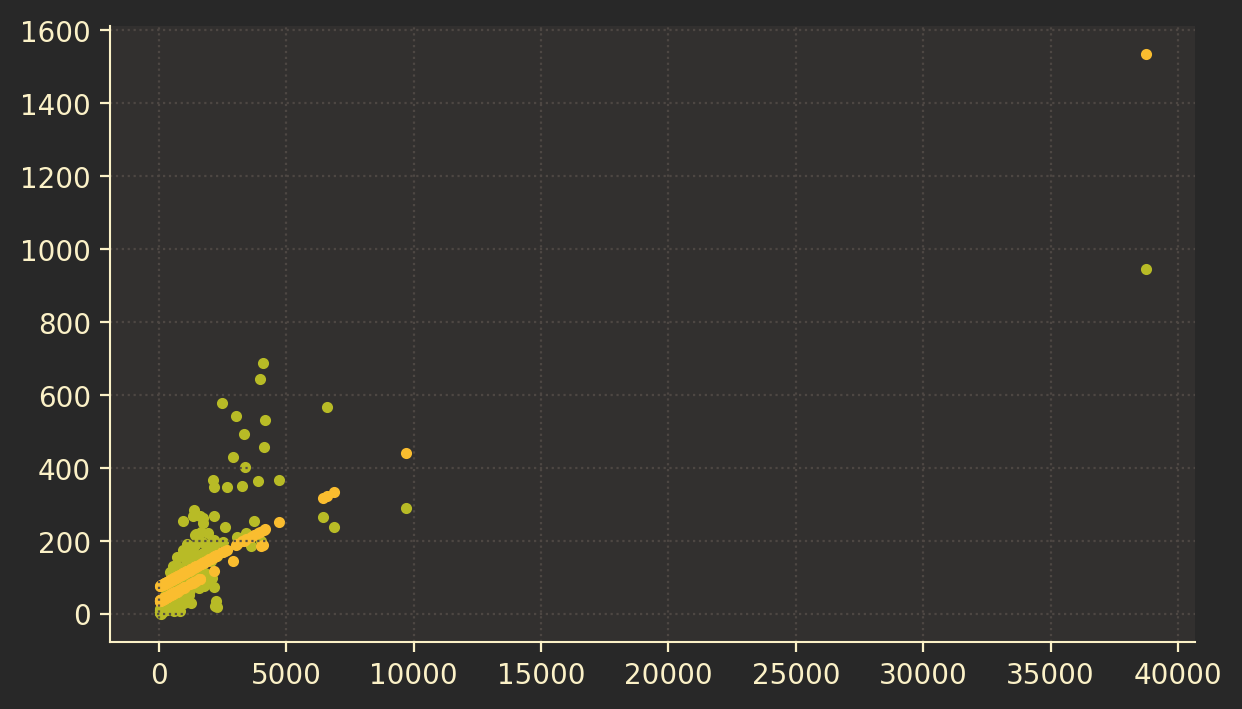

In [49]:
plt.style.use('gruvbox')
plt.scatter(hits, actual_kudos)
plt.scatter(hits, predicted_kudos)